In [4]:


from vpython import*
import random

# Defining canvas for 3D simulation

scene2 = canvas(title='Charged Particle in Electric Field', width=500, height=400, center=vector(0,0,0), align="left", background=vector(1,1,1))

# Defining Box and particle

lEbox = 10 # Size of box of electric field
lmax = 30 # Size of simulation area
Ebox = box(pos = vector (0,0,0), size = vector (2*lEbox,lEbox,lEbox), color = color.cyan, opacity=0.2)

particle = sphere( pos = vector(-lEbox*2,0,0), radius = 0.5, velocity = vec(10,0,0), charge = 1, mass = 10, color =color.blue, make_trail=True, trail_type="points", interval=20, retain=100)

# Defining function to calculation Electric field

def E(r):
  E_mag = 10
  E_dir = norm(vec(1,0,0))
  if (r.x>= -Ebox.size.x/2. and r.x <= Ebox.size.x/2. and r.y>= -Ebox.size.y/2. and r.y <= Ebox.size.y/2. and r.z>= -Ebox.size.z/2. and r.z <= Ebox.size.z/2.):
    E_val = E_mag*E_dir
  else:
    E_val = 0*E_dir
  return E_val

# Defining function to calculate acceleration due to electric force

def acc(a):
  force = a.charge*E(a.pos)
  return force/a.mass

# Defining Graph Canvas and Graph for motion of particle

graph1=graph(width=500,height=400,align="right", title='Kinetic Energy Vs. Time', xtitle='Time',ytitle='Kinetic Energy',foreground=color.black, background=color.white)
Graph_KE=gcurve(graph=graph1,color=color.red)

# Updating postion of particle in loop

t = 0
dt = 0.002

while (t <15):
  rate(100)
  particle.velocity = particle.velocity + acc(particle)*dt
  particle.pos = particle.pos + particle.velocity*dt
  
  KE = 0.5*particle.mass*mag(particle.velocity)**2
  Graph_KE.plot(pos=(t,KE))
  if (particle.pos.x > lmax or particle.pos.x < -lmax):  
    # Stop updating position of particle if goes outside region of interest
    break
  t = t+dt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

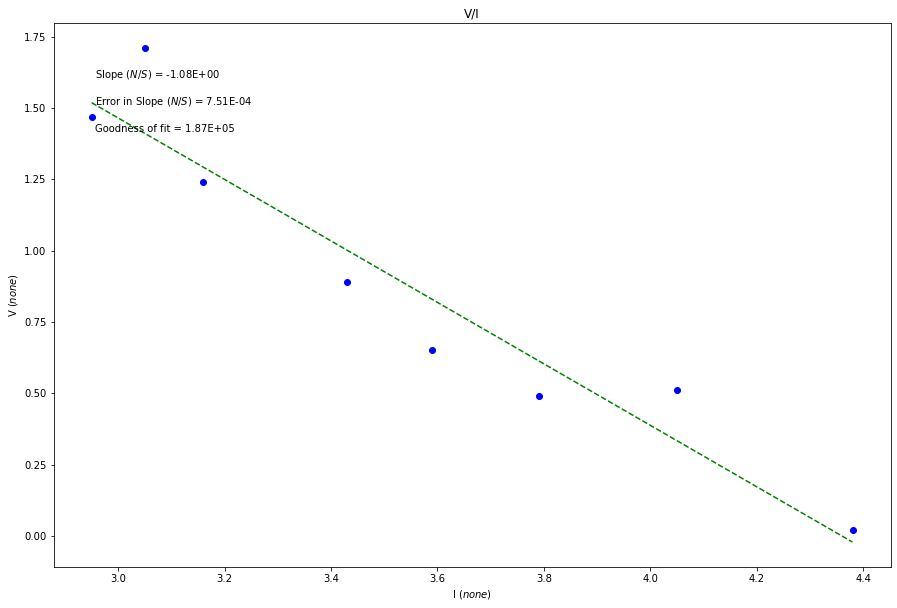

In [5]:
#Plotting
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#Re-assign variables as x, y, dy so that the following code may remain generic
x = np.array([2.95,3.05,3.16,3.43,3.59,3.79,4.05,4.38])
y = np.array([1.47,1.71,1.24,.89,.65,.49,.51,.02])
dy = np.array([.001,.001,.001,.001,.001,.001,.001,.001])
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x
#Calculate the error in slope and intercept (you do not need to understand how these are calculated). 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
    
D=Delta(x, dy)
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept
#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
#create labels  
plt.xlabel('I ($none$)')
plt.ylabel('V ($none$)')
plt.title('V/I')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="None") #don't need to plot x error bars
 
plt.annotate('Slope ($N$/$S$) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope ($N$/$S$) = {value:.{digits}E}'.format(value=dm, digits=2),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()